In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
import time
%matplotlib inline

In [37]:
%load_ext autoreload
%autoreload 2
from marcia import Sampler,Likelihood
from marcia import Data
from marcia import Cosmology as cosmo 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
Samp = Sampler('LCDM',['H0','Omega_m'],['Pantheon_plus'],[70,0.25],sampler_file='Chains/Pantheon_LCDM_Corr.h5',resume=False,max_n=1000)

Best-fit values: [75.0530695   0.33153695]
Max-Likelihood value (including prior likelihood):-701.4612684650086


 10%|█         | 100/1000 [00:18<02:59,  5.01it/s]

I:100, A:[676.4232158  634.70230174], T:[inf inf]


 20%|██        | 200/1000 [00:38<02:39,  5.02it/s]

I:200, A:[1021.57964369 1030.02654952], T:[0.36441048 0.40269395]


 30%|███       | 300/1000 [00:57<02:03,  5.66it/s]

I:300, A:[1274.99353207 1271.3043086 ], T:[0.22439069 0.21719393]


 40%|████      | 400/1000 [01:17<01:42,  5.86it/s]

I:400, A:[1391.82709238 1385.06071622], T:[0.12101255 0.11974742]


 50%|█████     | 500/1000 [01:37<01:39,  5.04it/s]

I:500, A:[1492.71644319 1453.32134891], T:[0.10081181 0.08614078]


 60%|██████    | 600/1000 [01:56<01:32,  4.32it/s]

I:600, A:[1475.49127881 1497.45023956], T:[0.03988204 0.06871624]


 70%|███████   | 700/1000 [02:15<00:57,  5.22it/s]

I:700, A:[1458.56128469 1494.50073404], T:[0.03848397 0.04422441]


 80%|████████  | 800/1000 [02:34<00:37,  5.29it/s]

I:800, A:[1369.49150055 1454.02680676], T:[0.00503815 0.02640877]


 90%|█████████ | 900/1000 [02:55<00:18,  5.34it/s]

I:900, A:[1374.90323482 1497.64643699], T:[0.0463368  0.05990025]


100%|██████████| 1000/1000 [03:17<00:00,  4.90it/s]

I:1000, A:[1396.46712653 1517.594713  ], T:[0.05072629 0.047644  ]


100%|██████████| 1000/1000 [03:17<00:00,  5.07it/s]


Removed no burn in
Best-fit values: [75.0530695   0.33153695]
Max-Likelihood value (including prior likelihood):-701.4612684650086


array([75.0530695 ,  0.33153695])

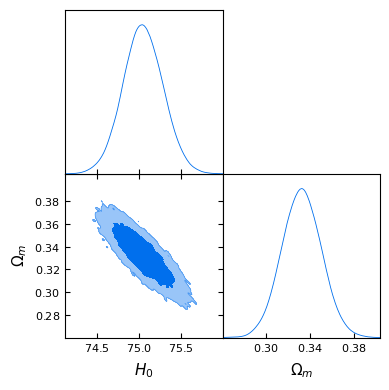

In [43]:
Samp.corner_plot(True)
Samp.MLE()

In [17]:
data =[ 'Pantheon_plus']
db = Data(data)

cmb_z, mb, covariance = db.get_pantheon_plus()
helio_z = db.get_pantheon_plus(Zhel=True)

plt.plot(cmb_z,mb,'o')

Best-fit values: [75.0530695   0.33153695]
Max-Likelihood value (including prior likelihood):-701.4612684650086


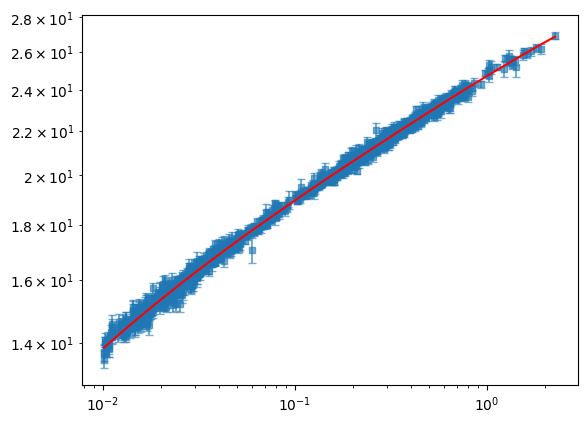

In [46]:
plt.xscale('log')
plt.yscale('log')
plt.errorbar(cmb_z,mb,yerr=np.sqrt(np.diag(covariance)),  markersize=5, alpha=0.6, capsize=3, fmt = 's')
plt.plot(cmb_z, Samp.likelihood.theory.distance_modulus(Samp.MLE(verbose=True),cmb_z, helio_z), 'r-', zorder = 10)
plt.show()

In [23]:
%matplotlib inline